In [2]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

os.chdir("/Users/etmu9498/research/code/scripts")
import make_plots
import helper_fns
import tc_metadata

In [3]:
# main function: create plots with TDR reflectivity, radial and vertical vels for all TCs!


def plot_all_tdr_vels( tc='all', no_eyewalls=False):
    # warnings.filterwarnings("ignore")

    # put tcname into a list to make the for loop work correctly
    if tc == 'all':
        tcname_list = ['grace', 'henri', 'ida', 'sam']
    else:
        tcname_list = [ tc]

    # look at a specific tc, or every tc!
    for tcname in tcname_list:
        # load data
        metadata = tc_metadata.all_data( tcname)
        if metadata == 'selected TC name is not yet implemented':
            print( metadata)
            return

        # print some helpful notices to the user
        print( "\nTC " + metadata['tc_name'])
        print( 'Number of TDR files: ' + str( len( metadata['xlims'] ))+ '\n')

        for dataset in range( len( metadata['eye_pass'])):
            
            plot_one_tdr_vel( metadata, dataset)

    return


In [4]:
# helper function used by the wrapper above to plot tdr reflectivity and vels for one example
def plot_one_tdr_vel( metadata, dataset):
    
        tdr_path = metadata[ 'new_tdr_path']
        crl_path = metadata[ 'new_crl_path']
        tdr_name, crl_name = tc_metadata.choose_new_data( metadata['tc_name'], dataset)
    
        print( tdr_name)
    
        # xr.open_dataset
        
        
        plt.figure( figsize=( 15, 16))
        helper_fns.change_font_sizes()
        
        plt.subplot( 311)
        plt.title("TC " + metadata['tc_name'] + ", " + metadata['dates'][dataset] + ", Eye Pass " + metadata[ 'eye_pass'][dataset])
        make_plots.plot_new_tdr( tdr_path, tdr_name)

        plt.subplot( 312)
        make_plots.plot_new_radial_vel( tdr_path, tdr_name)

        plt.subplot( 313)
        make_plots.plot_new_vertical_vel( tdr_path, tdr_name)

        
        # save the histogram
        os.chdir( "/Users/etmu9498/research/figures/tdr/reflectivity-and-vels")
        # plt.savefig( , bbox_inches='tight', dpi=300 )



TC Henri
Number of TDR files: 5

tdr-henri-08-20-eye-1.nc
tdr-henri-08-20-eye-3.nc
tdr-henri-08-21-eye-1.nc
tdr-henri-08-21-eye-2.nc
tdr-henri-08-21-eye-3.nc


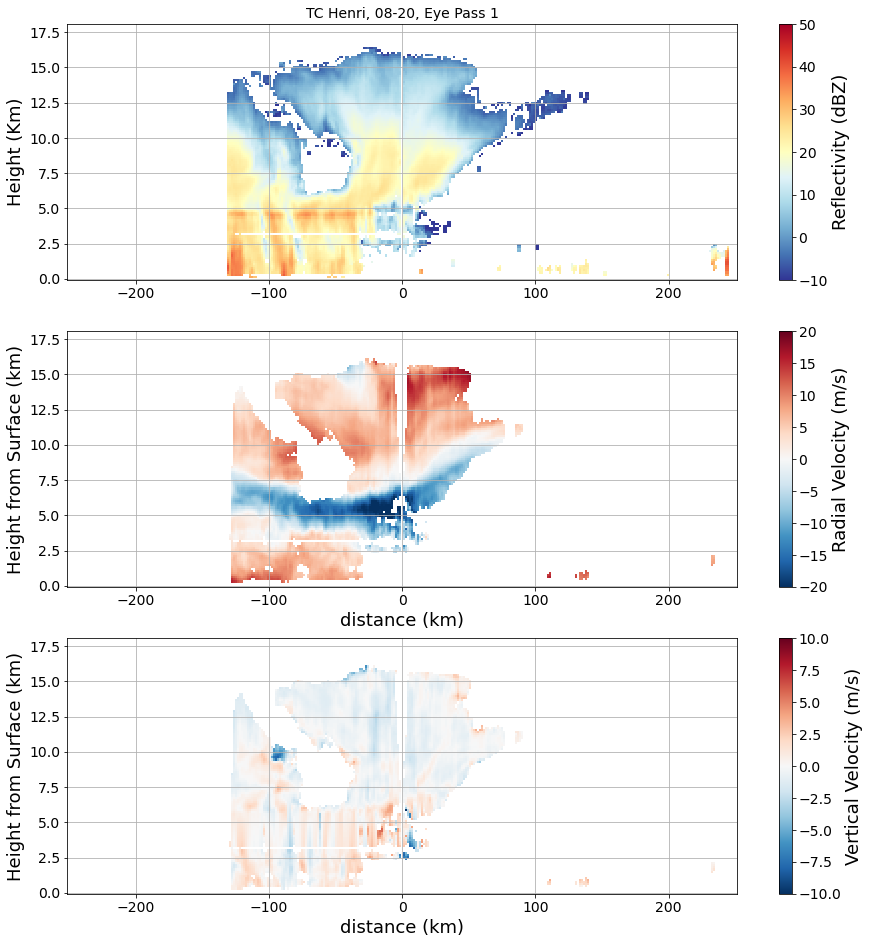

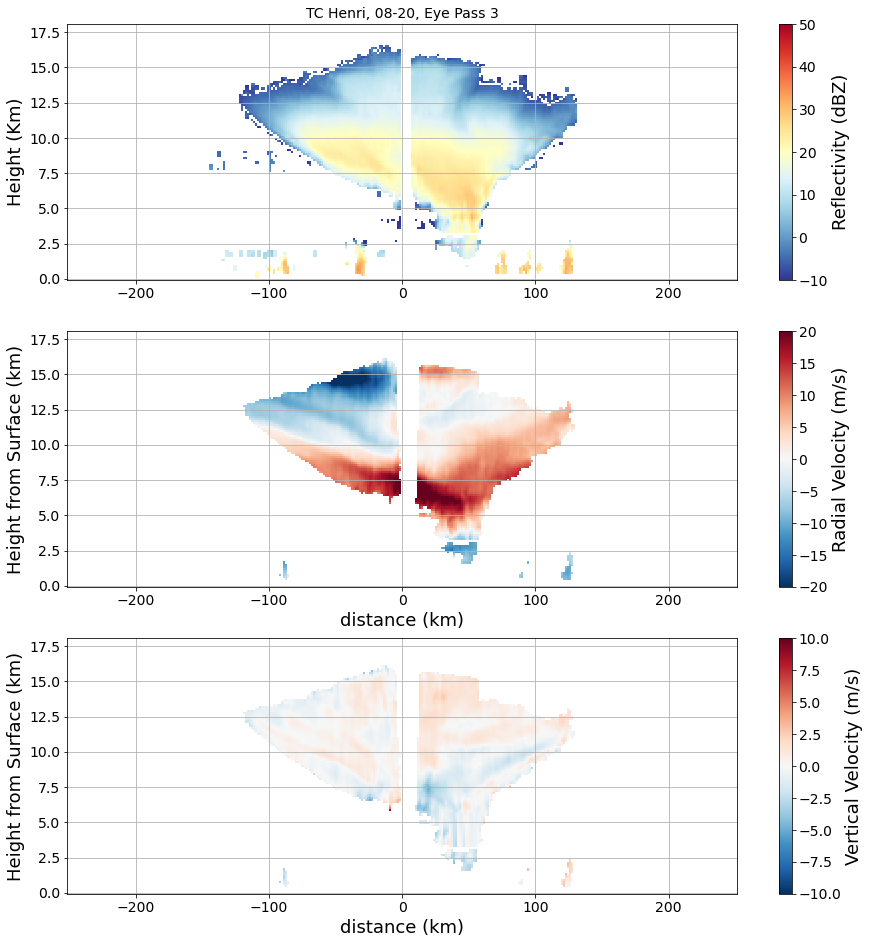

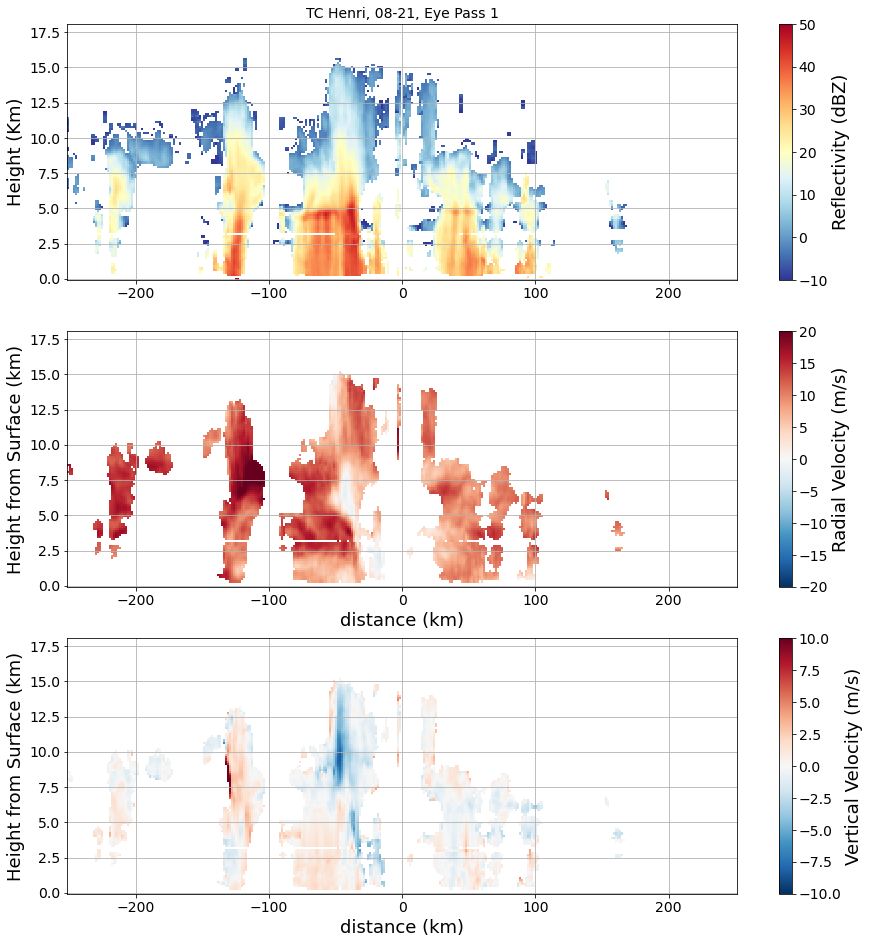

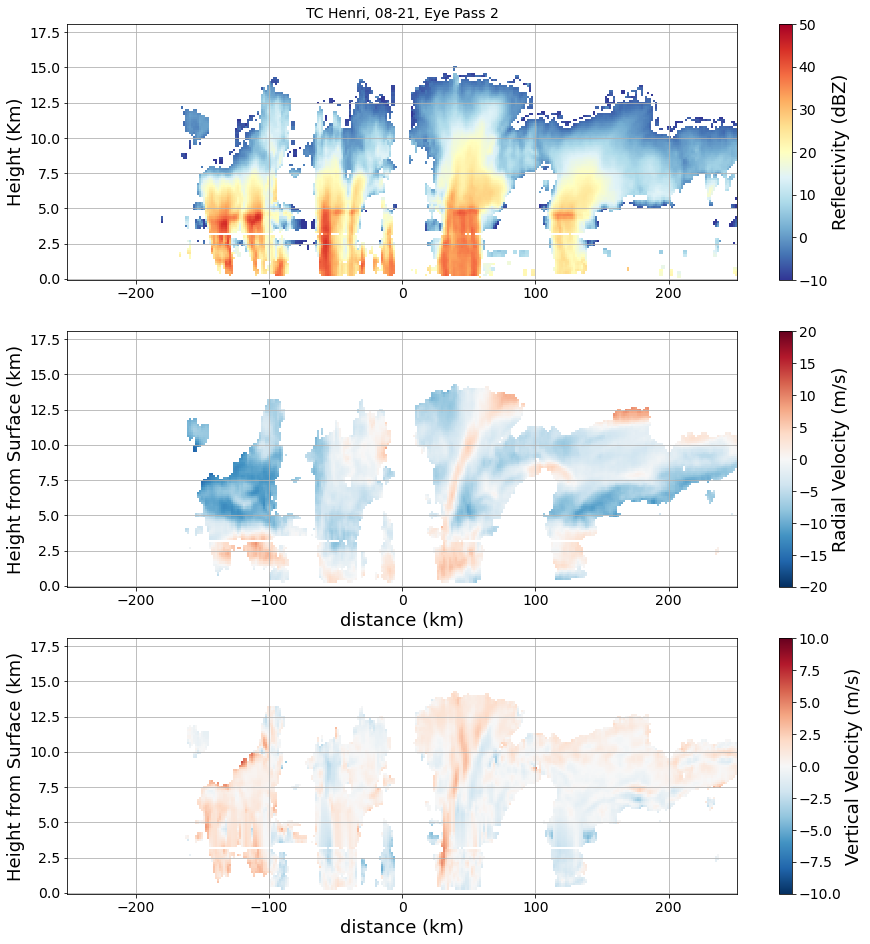

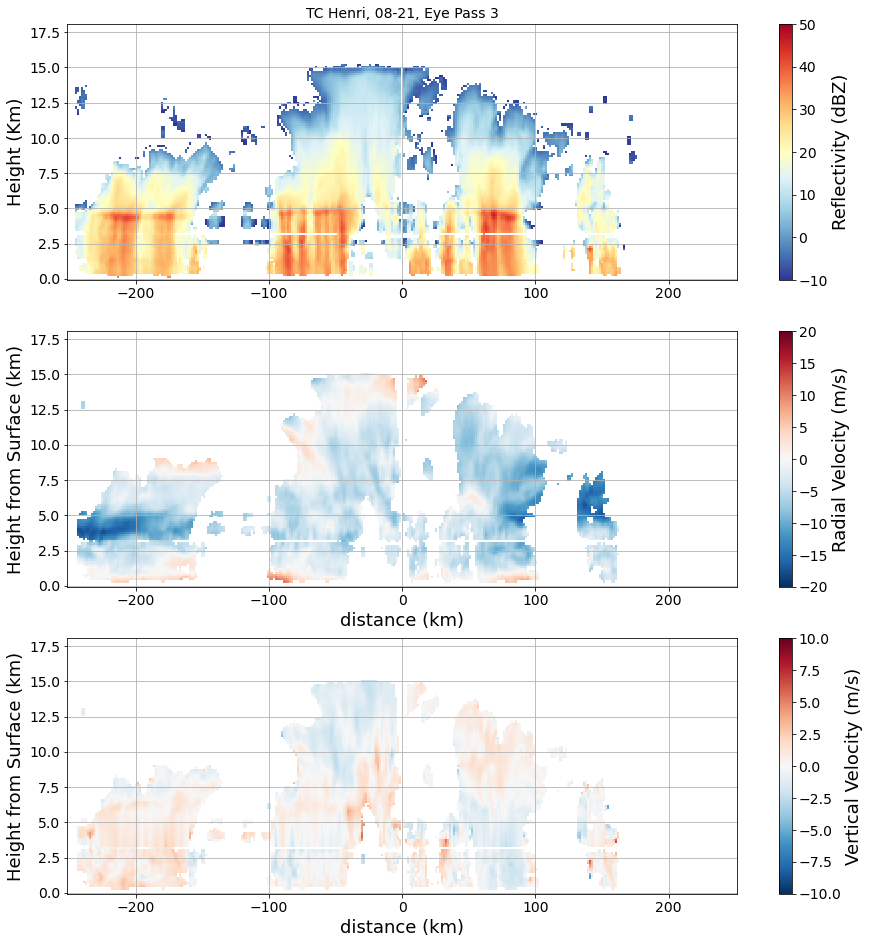

In [5]:
plot_all_tdr_vels(tc='henri')